In [1]:
from src import dataset as ds
import seaborn as sns
import numpy as np
import pandas as pd
import os
data_dir = os.getcwd() + "/data/"

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [4]:
train = pd.read_csv(data_dir + 'data_float.csv').drop(columns=["Unnamed: 0"])
#val = pd.read_csv(data_dir + 'data_test.csv').drop(columns=["Unnamed: 0"])

In [5]:
train

,msno,is_churn,num_25_mean,num_25_slope,num_50_mean,num_50_slope,num_75_mean,num_75_slope,num_985_mean,num_985_slope,...,recent_payment_method,payment_plan_mean,plan_list_price_mean,actual_amount_paid_mean,recent_auto_renew,n_transactions,recent_transaction,recent_expiry,recent_cancel,discount_mean
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,4.545455,-0.039423,0.363636,0.018376,0.272727,0.014957,0.181818,-0.017842,...,0.0,30.0,149.0,149.0,0.0,1,20170315.0,20170419.0,0.0,0.0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,0.000000,0.000000,0.666667,0.040632,0.333333,0.045147,0.000000,0.000000,...,36.0,30.0,180.0,180.0,1.0,1,20170311.0,20170411.0,1.0,0.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,4.500000,0.085991,1.750000,-0.054419,0.500000,0.002221,0.750000,0.007139,...,15.0,30.0,74.5,74.5,1.0,2,20170314.0,20170615.0,1.0,0.0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,41.0,30.0,149.0,149.0,2.0,10,20151208.0,20180108.0,1.0,0.0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,0.600000,-0.023881,0.466667,-0.017642,0.266667,0.010757,0.266667,0.015275,...,41.0,30.0,99.0,99.0,2.0,8,20170316.0,20170918.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970955,OHnZbu+EVaP+vN7Z+OfT5OMcp90MWFZonmM0o3pb8FY=,0,1.333333,0.054128,0.291667,-0.016062,0.166667,-0.008352,0.208333,-0.011886,...,40.0,30.0,149.0,149.0,2.0,1,20170304.0,20170403.0,1.0,0.0
970956,S92bDK//uI6hk3u1vuApro0qJBQOToBozZ7lL1yTC+w=,0,4.200000,-0.078018,1.600000,0.030913,1.000000,-0.033121,1.400000,-0.007605,...,41.0,30.0,99.0,99.0,2.0,1,20170310.0,20170410.0,1.0,0.0
970957,eUa3xo16vpAjr43Cjlb6Kjf1NTILYyJIkBayJQdXWnw=,0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,41.0,30.0,99.0,99.0,2.0,1,20170316.0,20170416.0,1.0,0.0
970958,iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=,0,1.434783,0.032564,0.434783,0.017214,0.260870,-0.003615,0.260870,0.009177,...,39.0,30.0,149.0,149.0,2.0,2,20170331.0,20170513.0,1.0,0.0


In [6]:
train.dtypes

msno                        object
is_churn                     int64
num_25_mean                float64
num_25_slope               float64
num_50_mean                float64
num_50_slope               float64
num_75_mean                float64
num_75_slope               float64
num_985_mean               float64
num_985_slope              float64
num_100_mean               float64
num_100_slope              float64
num_unq_mean               float64
num_unq_slope              float64
total_secs_mean            float64
total_secs_slope           float64
activity                   float64
city                       float64
bd                         float64
gender                       int64
registered_via             float64
registration_init_time     float64
recent_payment_method      float64
payment_plan_mean          float64
plan_list_price_mean       float64
actual_amount_paid_mean    float64
recent_auto_renew          float64
n_transactions               int64
recent_transaction  

In [13]:
# Get Train/Test
y = train['is_churn']
x = train.drop(columns=['is_churn']).set_index('msno')
"""
[
    ['num_25_mean',
     'num_25_slope',
     'num_50_mean',
     'num_50_slope',
     'num_75_mean',
     'num_75_slope',
     'num_985_mean',
     'num_985_slope',
     'num_100_mean',
     'num_100_slope',
     'num_unq_mean',
     'num_unq_slope',
     'total_secs_mean',
     'total_secs_slope',
     'activity',
     'recent_cancel',
     'discount_mean',
     'payment_plan_mean',
     'gender',
     'bd',
     'city',
     'registered_via',
     'recent_auto_renew',
    ]
]
"""

"\n[\n    ['num_25_mean',\n     'num_25_slope',\n     'num_50_mean',\n     'num_50_slope',\n     'num_75_mean',\n     'num_75_slope',\n     'num_985_mean',\n     'num_985_slope',\n     'num_100_mean',\n     'num_100_slope',\n     'num_unq_mean',\n     'num_unq_slope',\n     'total_secs_mean',\n     'total_secs_slope',\n     'activity',\n     'recent_cancel',\n     'discount_mean',\n     'payment_plan_mean',\n     'gender',\n     'bd',\n     'city',\n     'registered_via',\n     'recent_auto_renew',\n    ]\n]\n"

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(len(x_train),len(x_test))
print(len(y_train),len(y_test))
print(len(x),len(y))

873864 97096
873864 97096
970960 970960


In [15]:
x_train

,num_25_mean,num_25_slope,num_50_mean,num_50_slope,num_75_mean,num_75_slope,num_985_mean,num_985_slope,num_100_mean,num_100_slope,...,recent_payment_method,payment_plan_mean,plan_list_price_mean,actual_amount_paid_mean,recent_auto_renew,n_transactions,recent_transaction,recent_expiry,recent_cancel,discount_mean
msno,,,,,,,,,,,,,,,,,,,,,
SY0uJk/C2p8dTjybKZk3JzI7v2wQKubsMwgGNn6EsAI=,5.720000,-0.175416,1.760000,-0.041959,0.520000,0.028835,0.920000,-0.022458,25.880000,-0.379575,...,41.0,30.0,129.0,129.0,2.0,1,20170316.0,20170416.0,1.0,0.0
jyl1PGXahtjhdhPwYuGqYY+mPYXZRFMTlELoP646juQ=,1.333333,0.250000,0.500000,-0.022059,0.166667,-0.051471,0.333333,-0.147059,15.666667,-4.661765,...,0.0,30.0,149.0,149.0,0.0,1,20170315.0,20170419.0,0.0,0.0
29JHBk/Bwwi8l7IUhWcYh0NRIsY6mksabAyCCW7VcNk=,3.137931,-0.049978,0.931034,-0.011624,0.482759,0.001828,0.551724,-0.012640,23.482759,-0.185024,...,39.0,30.0,149.0,149.0,2.0,2,20170331.0,20170520.0,1.0,0.0
QJ6IPC5B21ZdMivQByf2jcQbVofDHxu7b1b48T/MtIU=,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,...,41.0,30.0,149.0,149.0,2.0,1,20170331.0,20170430.0,1.0,0.0
vowY63UMb8J5Utr5EBuC1MIU2wW42PGNIJ5xnycU0eY=,0.428571,0.001080,0.714286,-0.024041,0.285714,0.007023,0.428571,0.008644,5.714286,0.248244,...,41.0,30.0,99.0,99.0,2.0,1,20170318.0,20170418.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y5W6bhTbQcxfYSNpzq10AOwdGsOb2y/XJhqlvyEvGvY=,2.333333,0.192308,1.000000,0.461538,0.333333,0.076923,0.333333,0.192308,5.333333,0.884615,...,41.0,30.0,149.0,149.0,2.0,1,20170313.0,20170413.0,1.0,0.0
PPQg5yHFA4Xk8SlFeau0bUdOZLuZjKx9gJH3fBsz0dc=,1.500000,-0.095638,0.166667,0.005872,0.083333,0.010487,0.250000,-0.006292,7.083333,-0.034815,...,36.0,30.0,180.0,180.0,2.0,1,20170328.0,20170430.0,1.0,0.0
HLfuyZjN9PJMUbk+QOjZ4FHE8sYrA1iqtdsei4nseXU=,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,...,0.0,30.0,149.0,149.0,0.0,1,20170315.0,20170419.0,0.0,0.0


In [23]:
y_train

307795    0
39643     1
105647    0
486563    0
939333    0
         ..
136877    0
422442    0
586628    1
154594    0
386246    0
Name: is_churn, Length: 873864, dtype: int64

In [30]:
# Get Data and Targets
rf = RandomForestClassifier(class_weight={0:1, 1:(0.91/0.09)})
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10.111111111111112})

In [31]:
y_pred = rf.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9755808684188844


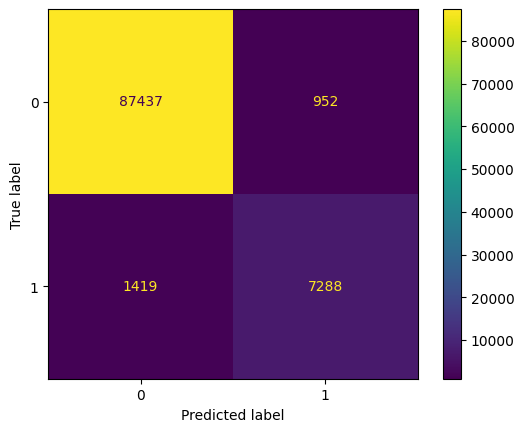

In [33]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9755808684188844
Precision: 0.8844660194174757
Recall: 0.8370276788790628


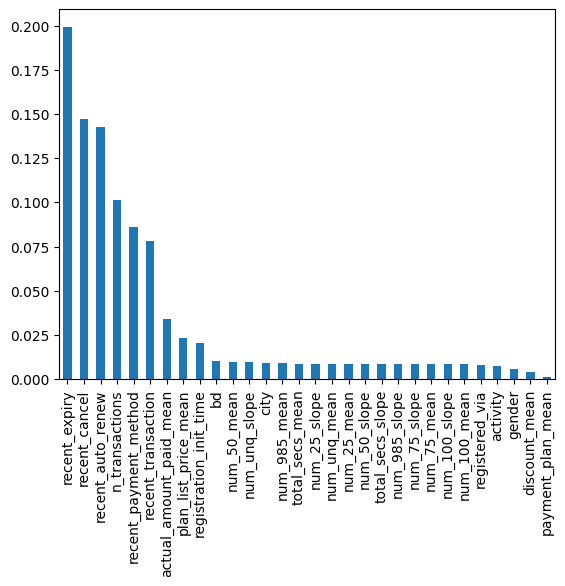

In [35]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();